In [24]:
# So far doesn't work 
using Symbolics
using Latexify
using BenchmarkTools
include("RBFunctions.jl")
using Plots
using LinearAlgebra
using IterativeSolvers

1. create PU and collocation points 
2. create trees for PU and collocation points 
3. for each PU point:
    1. find collocation points in range
    2. calculate the distance tensor 
    3. 

1 Create a tree of collocation points 
2 create a tree of PU points 

In [54]:
μ = 1
ρ = 1
@variables ϵ r x₁ x₂ ;
#r = sqrt(x₁^2 + x₂^2)
#ϕ = exp(-r^2*ϵ^2)
#ϕ = (1.0-r*ϵ)^8 * (32.0*(r*ϵ)^3 + 25.0* (r*ϵ)^2 + 8.0*r*ϵ + 1.0)
ϕ = (1-r*ϵ)^10 * (429*(r*ϵ)^4 + 450*(r*ϵ)^3 + 210*(r*ϵ)^2 + 50*(r*ϵ)+5)
#ϕ = (1-r*ϵ)^4 * (4r*ϵ+1)
#ϕ = substitute(ϕ, r=>sqrt(x₁^2 + x₂^2)) 
#
ϕ = simplify(ϕ,expand = true)
ϕ = substitute(ϕ, r=>sqrt(x₁^2 + x₂^2))
display(ϕ) 
#Δ(exprs) = expand_derivatives((Differential(x₁)^2)(exprs) + (Differential(x₂)^2)(exprs))
#∂₁(exprs) = simplify(expand_derivatives(Differential(x₁)(exprs)) + simplify(expand_derivatives(Differential(r)(exprs)) * (x₁/r)),expand = true)
#∂₂(exprs) = simplify(expand_derivatives(Differential(x₂)(exprs)) + simplify(expand_derivatives(Differential(r)(exprs)) * (x₂/r)),expand = true)

∂₁(exprs) = simplify(expand_derivatives(Differential(x₁)(exprs)))
∂₂(exprs) = simplify(expand_derivatives(Differential(x₂)(exprs)))

Δ(exprs) = ∂₁(∂₁(exprs)) + ∂₂(∂₂(exprs))
∂ₜ(exprs) = expand_derivatives(Differential(t)(exprs))
display(∂₁(∂₁(∂₁(∂₁(ϕ)))))
Φ_div = ([-∂₂(∂₂(ϕ)) ∂₁(∂₂(ϕ)) 0.0; ∂₁(∂₂(ϕ)) -∂₁(∂₁(ϕ)) 0.0; 0.0 0.0 ϕ])
#Φ_div = substitute.(Φ_div,r=>sqrt(x₁^2 + x₂^2))

#Φ_div = substitute.([ϕ 0.0 ; 0.0 ϕ],r=>sqrt(x₁^2 + x₂^2))

λu(x) = x[1]
λv(x) = x[2]
λp(x) = x[3]

λ1y(x) = (μ/ρ)*Δ(x[1]) -  (1/ρ)*∂₁(x[3])
λ2y(x) = (μ/ρ)*Δ(x[2]) -  (1/ρ)*∂₂(x[3])
λ3y(x) = x[1]
λ4y(x) = x[2]

λ1x(x) = (μ/ρ)*Δ(x[1]) - (1/ρ)*∂₁(x[3])
λ2x(x) = (μ/ρ)*Δ(x[2]) -  (1/ρ)*∂₂(x[3])
λ3x(x) = x[1]
λ4x(x) = x[2]

#display(Φ_div)


(5//1) + (429//1)*(ϵ^4)*(sqrt(x₁^2 + x₂^2)^4) + (429//1)*(ϵ^14)*(sqrt(x₁^2 + x₂^2)^14) + (15015//1)*(ϵ^8)*(sqrt(x₁^2 + x₂^2)^8) + (15015//1)*(ϵ^12)*(sqrt(x₁^2 + x₂^2)^12) + (45045//1)*(ϵ^10)*(sqrt(x₁^2 + x₂^2)^10) - (65//1)*(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2) - (2145//1)*(ϵ^6)*(sqrt(x₁^2 + x₂^2)^6) - (3840//1)*(ϵ^13)*(sqrt(x₁^2 + x₂^2)^13) - (33280//1)*(ϵ^11)*(sqrt(x₁^2 + x₂^2)^11) - (36608//1)*(ϵ^9)*(sqrt(x₁^2 + x₂^2)^9)

(10296//1)*(ϵ^4) + (216216//1)*(ϵ^14)*(sqrt(x₁^2 + x₂^2)^10) + (2162160//1)*(ϵ^8)*(sqrt(x₁^2 + x₂^2)^4) + (5405400//1)*(ϵ^12)*(sqrt(x₁^2 + x₂^2)^8) + (5765760//1)*(x₁^4)*(ϵ^8) + (10810800//1)*(ϵ^10)*(sqrt(x₁^2 + x₂^2)^6) + (17297280//1)*(x₁^2)*(ϵ^8)*(sqrt(x₁^2 + x₂^2)^2) + (129729600//1)*(x₁^2)*(ϵ^10)*(sqrt(x₁^2 + x₂^2)^4) + (86486400//1)*(x₁^4)*(ϵ^10)*(sqrt(x₁^2 + x₂^2)^2) + (86486400//1)*(x₁^4)*(ϵ^12)*(sqrt(x₁^2 + x₂^2)^4) + (4324320//1)*(x₁^2)*(ϵ^14)*(sqrt(x₁^2 + x₂^2)^8) + (5765760//1)*(x₁^4)*(ϵ^14)*(sqrt(x₁^2 + x₂^2)^6) + (86486400//1)*(x₁^2)*(ϵ^12)*(sqrt(x₁^2 + x₂^2)^6) - (154440//1)*(ϵ^6)*(sqrt(x₁^2 + x₂^2)^2) - (1647360//1)*(ϵ^13)*(sqrt(x₁^2 + x₂^2)^9) - (617760//1)*(x₁^2)*(ϵ^6) - (6918912//1)*(ϵ^9)*(sqrt(x₁^2 + x₂^2)^5) - (9884160//1)*(ϵ^11)*(sqrt(x₁^2 + x₂^2)^7) - (34594560//1)*(x₁^4)*(ϵ^13)*(sqrt(x₁^2 + x₂^2)^5) - (29652480//1)*(x₁^2)*(ϵ^13)*(sqrt(x₁^2 + x₂^2)^7) - (69189120//1)*(x₁^2)*(ϵ^9)*(sqrt(x₁^2 + x₂^2)^3) - (138378240//1)*(x₁^2)*(ϵ^11)*(sqrt(x₁^2 + x₂^2)^5) - (115315

λ4x (generic function with 1 method)

In [55]:
F_A = construct_kernel_array(Φ_div,[λ1x,λ2x,λ3x,λ4x],[λ1y,λ2y,λ3y,λ4y])
display(F_A[1,1])
F_A = compile_kernel_array(F_A)
F_E = construct_kernel_array(Φ_div,[λu,λv,λp],[λ1y,λ2y,λ3y,λ4y])
F_E = compile_kernel_array(F_E)


(2471040//1)*(ϵ^6) + (3432//1)*(x₁^2)*(ϵ^4) + (1716//1)*(ϵ^4)*(sqrt(x₁^2 + x₂^2)^2) + (6006//1)*(ϵ^14)*(sqrt(x₁^2 + x₂^2)^12) + (120120//1)*(ϵ^8)*(sqrt(x₁^2 + x₂^2)^6) + (450450//1)*(ϵ^10)*(sqrt(x₁^2 + x₂^2)^8) + (553512960//1)*(ϵ^11)*(sqrt(x₁^2 + x₂^2)^5) + (118609920//1)*(ϵ^13)*(sqrt(x₁^2 + x₂^2)^7) + (276756480//1)*(ϵ^9)*(sqrt(x₁^2 + x₂^2)^3) + (180180//1)*(ϵ^12)*(sqrt(x₁^2 + x₂^2)^10) + (720720//1)*(x₁^2)*(ϵ^8)*(sqrt(x₁^2 + x₂^2)^4) + (345945600//1)*(x₁^4)*(ϵ^11)*sqrt(x₁^2 + x₂^2) + (588107520//1)*(x₂^4)*(ϵ^9)*(sqrt(x₁^2 + x₂^2)^-1) + (34594560//1)*(x₁^4)*(ϵ^9)*(sqrt(x₁^2 + x₂^2)^-1) + (1801800//1)*(x₁^2)*(ϵ^12)*(sqrt(x₁^2 + x₂^2)^8) + (72072//1)*(x₁^2)*(ϵ^14)*(sqrt(x₁^2 + x₂^2)^10) + (415134720//1)*(x₁^2)*(ϵ^9)*sqrt(x₁^2 + x₂^2) + (2075673600//1)*(x₂^2)*(ϵ^9)*sqrt(x₁^2 + x₂^2) + (1383782400//1)*(x₁^2)*(ϵ^11)*(sqrt(x₁^2 + x₂^2)^3) + (3603600//1)*(x₁^2)*(ϵ^10)*(sqrt(x₁^2 + x₂^2)^6) + (2075673600//1)*(x₂^2)*(ϵ^13)*(sqrt(x₁^2 + x₂^2)^5) + (5881075200//1)*(x₂^4)*(ϵ^11)*sqrt(x₁^2 + x₂^2

3×4 Matrix{Function}:
 #349  #351  #353  #355
 #357  #359  #361  #363
 #365  #367  #369  #371

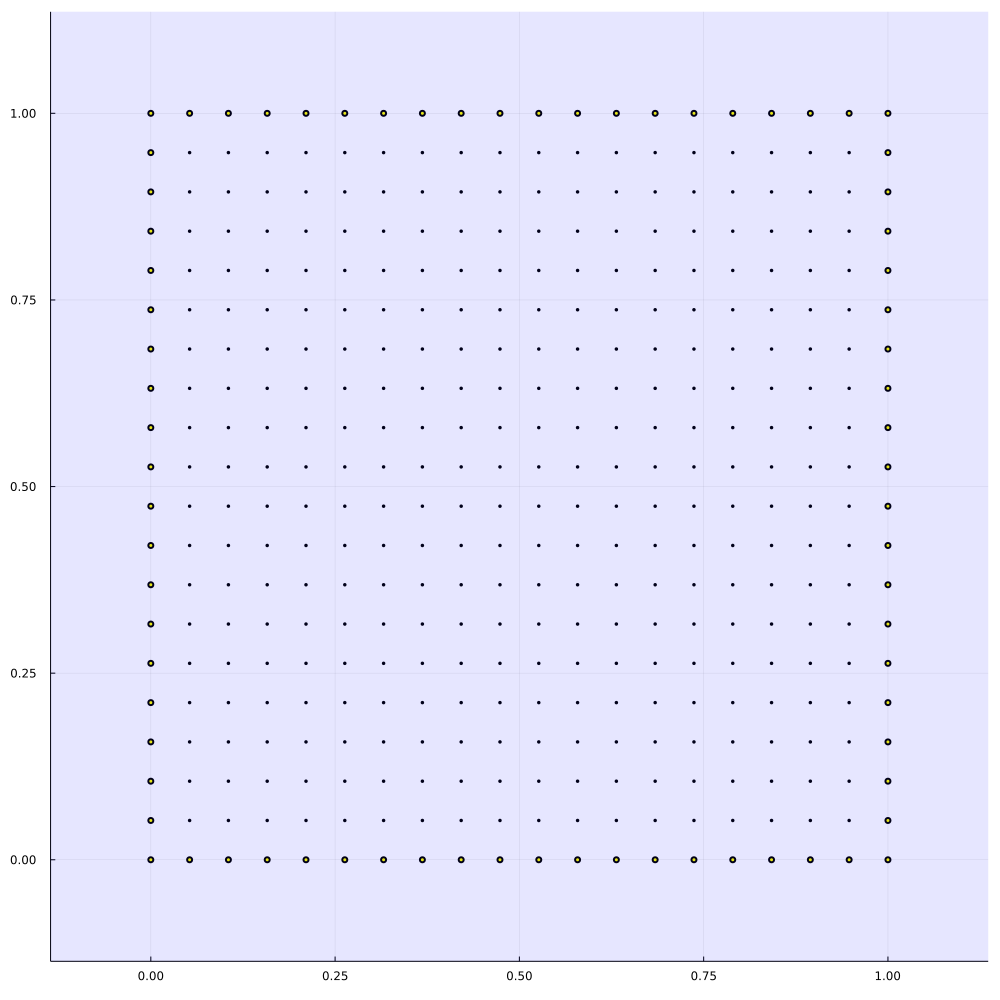

In [80]:
# create points
function circle(x,y,r)
    phi = LinRange(0,2*π,40)
    return x .+ r*sin.(phi), y .+ r*cos.(phi)
end
N_coll = 20
N_pu = Int(N_coll/2)
r_pu = 2#2/N_pu
Internal_points,Boundary_points = generate_2D_equally_spaced_points(N_coll)
PU_points = hcat(generate_2D_equally_spaced_points(N_pu)...)
PU_points = reshape([0.5,0.5],(2,1))
N_i = size(Internal_points)[2]
N_b = size(Boundary_points)[2]
#Test_points = generate_2D_Halton_points(3000)
#Test_points = hcat(generate_2D_equally_spaced_points(77)...)
Test_points = hcat(Internal_points,Boundary_points)
N_t = size(Test_points)[2]
scatter(Internal_points[1,:],Internal_points[2,:],markersize = 2,markercolor = :black,size=(1000,1000),lims=[-0.1,1.1])
scatter!(Boundary_points[1,:],Boundary_points[2,:],markersize = 3,markercolor = :yellow)
#scatter!(Test_points[1,:],Test_points[2,:],markersize = 3,markercolor = :green,linecolor=:green)
for i in 1:size(PU_points)[2]
    x = PU_points[1,i]
    y = PU_points[2,i]
    plot!(circle(x,y,r_pu),seriestype = [:shape,],linecolor=:black,legend=false,c =:blue,fillalpha = 0.1,linewidth= 0.5)
end
#scatter!(PU_points[1,:],PU_points[2,:],markercolor = :blue,markeralpha = 0.1,markersize = Int(r_pu*600),markerstrokealpha = 0)
plot!()

In [81]:
# function that builds the interpolation matrix 
#  I I B B
#I 
#I 
#B 
#B 
param = 0.1

Point_list = [Internal_points,Internal_points,Boundary_points,Boundary_points]
A = Matrix{Matrix}(undef,4,4)
for i in 1:4
    for j in 1:4
        A[i,j] = PU_interpolation_matrix(Point_list[i],Point_list[j],PU_points,F_A[i,j],param,r_pu)
    end
end


Point_list2 = [Test_points,Test_points,Test_points]
E = Matrix{Matrix}(undef,3,4)
for i in 1:3
    for j in 1:4
        E[i,j] = PU_interpolation_matrix(Point_list2[i],Point_list[j],PU_points,F_E[i,j],param,r_pu)
    end
end
A = flatten(A)
#A = sparse(A)

E = flatten(E)
#E = sparse(E)




#= TA = crete_block_point_tensors([Internal_points,Internal_points,Boundary_points,Boundary_points],
                                [Internal_points,Internal_points,Boundary_points,Boundary_points])


A2 = generate_block_matrices(F_A,TA,param)
A2 = flatten(A2)



TE = crete_block_point_tensors([Test_points,Test_points,Test_points],
                                [Internal_points,Internal_points,Boundary_points,Boundary_points])

E2 = generate_block_matrices(F_E,TE,param)
E2 = flatten(E2)
 =#





1200×800 Matrix{Float64}:
 -1.3728    -1.37024   -1.36257   …  0.2177     0.228413   0.238652
 -1.37024   -1.3728    -1.37024      0.206528   0.2177     0.228413
 -1.36257   -1.37024   -1.3728       0.194915   0.206528   0.2177
 -1.34987   -1.36257   -1.37024      0.182881   0.194915   0.206528
 -1.33225   -1.34987   -1.36257      0.170448   0.182881   0.194915
 -1.30986   -1.33225   -1.34987   …  0.157639   0.170448   0.182881
 -1.28289   -1.30986   -1.33225      0.144478   0.157639   0.170448
 -1.25155   -1.28289   -1.30986      0.130993   0.144478   0.157639
 -1.21607   -1.25155   -1.28289      0.117211   0.130993   0.144478
 -1.1767    -1.21607   -1.25155      0.10316    0.117211   0.130993
 -1.13371   -1.1767    -1.21607   …  0.0888729  0.10316    0.117211
 -1.08739   -1.13371   -1.1767       0.0743798  0.0888729  0.10316
 -1.03802   -1.08739   -1.13371      0.0597137  0.0743798  0.0888729
  ⋮                               ⋱                        
  1.07567    1.08073    1.08502 

In [82]:
#println("sparsity of A: ",length(sparse(A).nzval)/(size(A)[1]^2)*100,"%")
#println("sparsity of E: ",length(sparse(E).nzval)/(size(E)[1]^2)*100,"%")
println(cond(A))
#Plots.heatmap(A[1000:1500,1000:1500])


1.3907782650942048e15


In [83]:
#test problem 
function true_v1(x,y)
    return 20*x*y^3
end
function true_v2(x,y)
    return 5*x^4 - 5*y^4
end
function true_pressure(x,y)
    return 60*x*x*y - 20*y^3 
end
Internal_points,Internal_points,Boundary_points,Boundary_points
RHS = vcat(
    zeros(N_i*2),
    true_v1.(Boundary_points[1,:],Boundary_points[2,:]),
    true_v2.(Boundary_points[1,:],Boundary_points[2,:])
    )
reference_v_and_p = vcat(true_v1.(Test_points[1,:],Test_points[2,:]),
                        true_v2.(Test_points[1,:],Test_points[2,:]),
                        true_pressure.(Test_points[1,:],Test_points[2,:])
                        )

RHS
#c = gmres(A,RHS)
c = A\RHS

maximum(abs.(A*c - RHS))

1.9418075680732727e-7

5.7303277190098874e-5
0.00019995969005626862


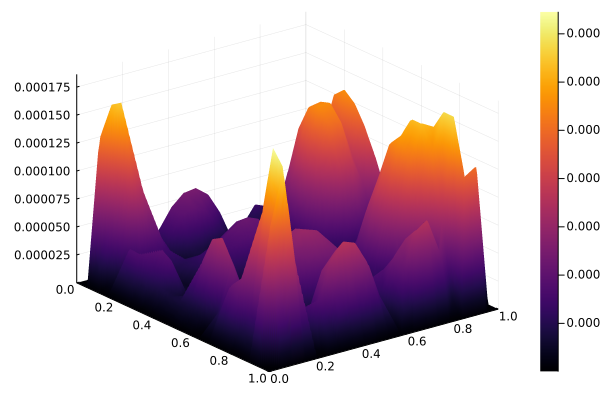

In [84]:
error = abs.((E*c)[1:2*N_t] - reference_v_and_p[1:2*N_t])
println(sqrt(sum(error .^2)/length(error)))
#surface((E*c)[1:Int(length(error)/2)],Test_points[1,:],Test_points[2,:])

#length(Test_points[1,:])
println(maximum(abs.(error)))
#scatter(Test_points[1,:], Test_points[2,:], zcolor=error[1+N_t:2*N_t],markerstrokewidth = 0,markerstrokestyle  = :rect )
#scatter(Test_points[1,:],Test_points[2,:],(E*c)[1:N_t],camera=(50,50))
#scatter(Test_points[1,:],Test_points[2,:],reference_v_and_p[1:N_t],camera=(50,50))
surface(Test_points[1,:],Test_points[2,:],error[1:N_t],camera=(50,50))